### referencias úteis

* [Monte Carlo](https://pbpython.com/monte-carlo.html)
* [(Sukanta,2014)](https://www.ias.ac.in/article/fulltext/reso/019/08/0713-0739)

* [Feiguin](https://github.com/afeiguin/comp-phys/blob/master/10_01_montecarlo_integration.ipynb) 

* [Variância](https://mathworld.wolfram.com/Variance.html)

# Calculando o COT via DlogR por Monte Carlo de caixa adaptável

## Importação de módulos externos

In [1]:
import random
import numpy as np
import math
import random
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output
from datetime import datetime
import pytz



#Configurando figura e o rc parameters
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (10,5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size = 20)

### Funções de trabalho

In [2]:
#### Funções utilizadas #####
def dlogr(res,resb,x,xb,m):
    '''Função que determina o Delta log R dos pares ordenados de propriedades
    Resistividade e Sônico ou Resistividade ou Densidade. 
    Entradas:
    res, dados de resistividade
    reb, baseline
    x, canal de densidade ou sônico
    xb, baseline da densidade ou sônico
    m, coeficiente de cimentação
    Saída:
    DlogR, Delta Log R'''
    import math
    
    #Recurso computacional para eliminar os zeros:
    dummy = 1e-100000
    
    if np.size(res) > 1:
        dado  = len(res)
        DlogR = np.zeros(dado)
        res   = np.array(res)
        x     = np.array(x)
        resb  = np.min(res)
        xb    = np.median(x)
        for i in range(dado):
            DlogR[i]=math.log10(res[i]/(resb+dummy))+((1/np.log(10))*(m/(x[i]-xb))*(x[i]-xb))
            if x[i]/xb < 0:
                print(x[i]-xb)
                if res[i]/resb < 0:
                    print("Cuidado! Log negativo!",res[i]-resb)
     
    
    
    else:
        res = float(res)
        resb = float(resb)
        x = float(x)
        xb = float(xb)
        DlogR=math.log10(res/(resb+dummy))+((1/np.log(10))*(m/(x-xb))*(x-xb))
        
        
    return DlogR

def dlogr90(res,resb,x,xb):
    
    
    if np.size(res) > 1:
        dado  = len(res)
        DlogR = np.zeros(dado)
        res   = np.array(res)
        x     = np.array(x)
        resb  = np.min(res)
        xb    = np.median(x)
        for i in range(dado):
            DlogR[i]=math.log10(res[i]/(resb))+(0.02*(x[i]-xb))
            if x[i]/xb < 0:
                print(x[i]-xb)
                if res[i]/resb < 0:
                    print("Cuidado! Log negativo!",res[i]-resb)
    else:
        res = float(res)
        resb = float(resb)
        x = float(x)
        xb = float(xb)
        DlogR=math.log10(res/(resb))+(0.02*(x-xb))
        
    return DlogR

#############################

def passey16(drlog,alfa,beta,delta,eta,Tmax,gr,grb):
    '''Função que determina COT via delta log R
        Entradas:
    drlog,parâmetro calculado
    alfa, parâmetro estimado
    beta, parâmetro estimado
    delta, parâmetro estimado
    eta, parâmetro estimado
    Tmax, indicador de maturidade em oC
    gr, canal raio gama
    Saída:
    COT, Conteúdo orgânico total
    '''
    
    if np.size(drlog) > 1:
        dado = len(gr)
        COT  = np.zeros(dado)
        gr   = np.array(gr)
        grb  = np.median(gr) 
        for i in range(dado):
            COT[i] = (alfa*drlog[i] + beta*(gr[i]-grb))*10**(delta-eta*Tmax)
            #print(COT[i],delta-eta*Tmax)
    else:
        gr = float(gr)
        grb = float(grb)
        COT = (alfa*drlog + beta*(gr-grb))*10**(delta-eta*Tmax)
        
    return COT

## O método $\Delta_{log}R$ para determinação do COT sintético 

O método publicado por Passey et al. (1990) foi desenvolvido e testado pela
Exxon/Esso em 1979 e aplicado desde então em diversos poços pelo mundo. Passey
et al. (1990) partem do princípio de que as rochas são compostas por três componentes: a matriz, a matéria orgânica sólida e os fluidos que preenchem os poros. 

O método se baseia no fato de que uma rocha geradora possui respostas nos perfis
diferentes, mas proporcionais à sua maturação e ao seu conteúdo orgânico. Ou seja,
o perfil é sensível à variação de COT(Perfil Sônico) e a transformação da matéria
orgânica sólida em fluido(Perfil de Resistividade).
Logo, para aplicação do método são necessárias as curvas de perfil resistividade
e perfil sônico. O perfil sônico deve estar ajustado na escala de -100µs/pé para cada dois ciclos logarítmicos de resistividade. 

Após isso, uma linha base deverá ser
definida em um intervalo de uma rocha de granulometria fina não geradora, onde
as curvas de resistividade e sônico estejam sobrepostas. A separação das
curvas de Sônico e Resistividade em intervalos de rocha geradora é denominada de
∆LogR, que é linearmente relacionada ao teor de COT em função da maturidade
(PASSEY et al., 1990). 

### Determinação do $\Delta_{log}R$ via método de Passey (1990)

Passey et al (1990) propuseram um método que estima o COT sintético baseada curvas que indicam a escala de porosidade da rocha alvo. Essas informações de porosidade são retiradas de dois perfis o perfil sônico que mede o tempo de trânsito e o perfil de resistividade que infere a resistividade na rocha estudada. As informações de porosidade assiciada a leitura desses dois perfis indicam a aviabilidade de ocorrência de rochas com alto conteúdo de matéria orgância. O conteúdo de querogênio associado ao alto conteúdo de matéria orgânica ocasiona um efeito nos dois perfis mensionados acima. Os efeitos são: baixa no valor de densidade e baixa no valor de tempo de trânsito. Além disso o perfil de resistividade apresenta uma alta na presença do kerogênio em rochas com alta porosoidade. 


\begin{equation}
\Delta_{log}R = log_{10} \big{(} \dfrac{R}{R_{baseline}} \big{)} + 0.02 \times (DT - DT_{baseline})
\end{equation}

### Solução genérica da função de Passey e Wang via método para determinação do $\Delta_{log}R$. 

Wang revisitou a equação de Passey e com base nos teores de vitrinita e curvas de R, DT, RHO e GR cria uma nova relação empírica para os folhelhos devonianos. Note que é possível calcular o $\Delta_{log}R $ de duas maneiras possíveis.

\begin{equation}
\Delta_{log}R = log_{10} \big{(} \dfrac{R}{R_{baseline}} \big{)} + \dfrac{1}{ln 10} \dfrac{m}{(DT - DT_{m})} \times (DT - DT_{baseline})
\end{equation}

\begin{equation}
\Delta_{log}R = log_{10} \big{(} \dfrac{R}{R_{baseline}} \big{)} + \dfrac{1}{ln 10 } \dfrac{m}{(RHO_{m} - RHO)} \times (RHO  - RHO_{baseline})
\end{equation}

\begin{equation}
COT = [ \alpha \Delta_{log}R + \beta (GR - GR_{baseline}) ] \times 10^{(\delta-\eta Tmax)}
\end{equation}


Onde $DT_{m}$ é o canal sônico medida em tempo de trânsito ($\mu s/ft$), $\textbf{m}$ representa o coeficiente de cimentação, $RHO$ e $RHO_{baseline}$ representam o canal de densidades e sua média em ($g/cm^{3}$), $R$ e $R_{baseline}$ são  o canal de resistividade e o valor de base correspondente, $[\alpha, \beta,\delta,\eta]$ sãos constantes da equação que varia de acordo com a formação geológica e $T_{max}$ é o indicador de maturidade ($^{\circ} C$), $GR$ é o canal de raio gamma e o $GR_{baseline}$ é a média do canal raio gama (API).



### Tabela de coeficientes (Mahmud,2015)

A tabela original publicada é composta 4 subtabelas geradas por quatro modelos de inteligência artificial. Abaixo é apresentada uma dessas tabelas. Esses dados foram utilizados para compilar uma nova tabela para o cálculo dos coeficientes via monte carlo. Esse arquivo foi denominado dado.txt

Dados (n = 671) |   R  | DT   | GR  | RHOB | COT |
----------------|-------|------|-----|------|-----|
Mínimo          | 4.97  |50.95 |27.37| 2.39 | 0.76| 
Máximo          |163.6  |97.1  |146.9| 2.7  |  5.1|
Alcance         |158.6  |  46.1|119.6| 0.3  | 4.4 |
Desvio Padrão   |39.81  |8.20  |21.63|0.07  |0.96 | 
Variância       |1585   | 67   |468  |0.0044|0.916|

# 1) Dados de entrada

## 1.1) Poços: 

Cálculo da COT baseado no chute inicial com os coeficientes retirados dos dados de poços

In [24]:
#dadode entrada
cab = ['Depth','Cali','DT_merge','GR','INPEFA_1','INPEFA_2','INPEFA_3','INPEFA_4','LITO','LLD','OG','RESD','ZDEN']
datareal = pd.read_csv('../entradas/las/6-ESS-168_resample.las', sep='\\s+',
                       skiprows=73, names = cab, usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12))
df = pd.DataFrame(datareal)
print(len(df))
df

18991


,Depth,Cali,DT_merge,GR,INPEFA_1,INPEFA_2,INPEFA_3,INPEFA_4,LITO,LLD,OG,RESD,ZDEN
0,860.9839,-9999.0,-9999.0,20.85830,0.015781,0.048535,0.092263,0.264229,-9,-9999.00000,20.85830,-9999.0,-9999.0
1,861.1839,-9999.0,-9999.0,21.63505,0.012280,0.042130,0.085761,0.259635,-9,-9999.00000,21.63505,-9999.0,-9999.0
2,861.3839,-9999.0,-9999.0,20.83950,0.009775,0.035217,0.074328,0.234105,-9,-9999.00000,20.83950,-9999.0,-9999.0
3,861.5839,-9999.0,-9999.0,20.42489,0.009991,0.036388,0.075704,0.231250,-9,-9999.00000,20.42489,-9999.0,-9999.0
4,861.7839,-9999.0,-9999.0,20.76275,0.011838,0.041781,0.083118,0.239003,-9,-9999.00000,20.76275,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18986,4658.1839,-9999.0,-9999.0,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,57,13.34388,-9999.00000,-9999.0,-9999.0
18987,4658.3839,-9999.0,-9999.0,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,57,12.57274,-9999.00000,-9999.0,-9999.0
18988,4658.5839,-9999.0,-9999.0,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,57,12.66743,-9999.00000,-9999.0,-9999.0
18989,4658.7839,-9999.0,-9999.0,-9999.00000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,57,12.65428,-9999.00000,-9999.0,-9999.0


## 1.2) Preprocessamento

In [25]:
# Retira as colunas:
df=df.drop('INPEFA_1',axis=1) #retira a coluna da profundidade duplicada
df=df.drop('INPEFA_2',axis=1) #retira a coluna caliper
df=df.drop('INPEFA_3',axis=1) #retira a coluna nphi
df=df.drop('INPEFA_4',axis=1) #retira a coluna drho
#df=df.drop('LITO',axis=1) #retira a coluna ild
#df=df.drop('OG',axis=1) #retira a coluna ild

In [26]:
#Filtra os expúrios ferramentais:
#df=df[(df['RHOB'] != -9999) & (df['RHOB'] != -999999.9999)] 
df=df[(df['DT_merge'] != -9999) & (df['DT_merge'] != -999999.9999)]
#df=df[(df['GR'] != -9999) &  (df['GR'] != -999999.9999)]
#df=df[(df['Cali'] != -9999) &  (df['Cali'] != -999999.9999)]
#df=df[(df['NPHI'] != -9999) &  (df['NPHI'] != -999999.9999)]
df=df[(df['LLD'] != -9999) &  (df['LLD'] != -999999.9999)]
#df=df[(df['RESD'] != -9999) &  (df['RESD'] != -999999.9999)]

In [27]:
#Inverte as linhas do dataframe e reseta os índices:
#df=df[::-1].reset_index()
print(df)

           Depth         Cali  DT_merge         GR  LITO        LLD  \
18746  4610.1839     8.989479  62.28869   82.11620    57   7.339714   
18747  4610.3839     9.017262  62.23649   87.16961    57   7.482254   
18748  4610.5839     9.054691  62.25541   84.96584    57   7.347755   
18749  4610.7839     9.083041  62.27635   80.55154    57   7.237862   
18750  4610.9839     8.882217  62.27126   79.14693    57   6.972360   
...          ...          ...       ...        ...   ...        ...   
18919  4644.7839 -9999.000000  66.56739  107.72280    57  15.961800   
18920  4644.9839 -9999.000000  66.48129  106.42290    57  14.697350   
18921  4645.1839 -9999.000000  66.58543  101.69330    57  13.679630   
18922  4645.3839 -9999.000000  67.25388   99.34881    57  13.274080   
18923  4645.5839 -9999.000000  66.53243   98.20706    57  12.598900   

              OG    RESD         ZDEN  
18746   82.11620 -9999.0     2.670002  
18747   87.16961 -9999.0     2.649270  
18748   84.96584 -9999.0   

In [28]:
#separando as informações do dado em variáveis distintas
z = df[df.columns[0]]#prof
DT = df[df.columns[2]]#sonico
#NPHI = df[df.columns[7]]#neutrao
#RHOB = df[df.columns[8]]#densidade
GR = df[df.columns[3]]#GR
LLD = df[df.columns[5]]#resistividade
CODE = df[df.columns[4]]#código
CALIPER = df[df.columns[1]]#caliper
print(CODE)

18746    57
18747    57
18748    57
18749    57
18750    57
         ..
18919    57
18920    57
18921    57
18922    57
18923    57
Name: LITO, Length: 178, dtype: int64


In [29]:
#----------------------------------------------------------#
#            Filtra trechos desmoronados:                  #
#----------------------------------------------------------#
#Parametros do poço:
# diametro = 9 pol
# lam = +/- 2 pol (limite aceitavel maximo)
dim = 9
delta = 2
ls = dim + delta
li = dim - delta

#I - filtragem caliper:

#df=df[(df['Cali'] >= li) & (df['Cali'] <= ls)]#informação baseada diametro do poco

# II - filtragem visual: selecao de um alvo especifico idade ou grupo
#topo =1750.0
#base = 2300.0
#df=df[(df['Depth1(m)'] >= topo) & (df['Depth1(m)'] <= base)] # alvo! 

In [30]:
code = df[df.columns[4]]#código 
print(code)

18746    57
18747    57
18748    57
18749    57
18750    57
         ..
18919    57
18920    57
18921    57
18922    57
18923    57
Name: LITO, Length: 178, dtype: int64


In [31]:
# CAlculo do baseline para o dado real
GRbaseline = np.min(GR)
DTbaseline = np.min(DT)
LLDbaseline = np.min(LLD)

print(LLDbaseline)

5.086628


## 1.2) Tabela (2022):

Dados utilizados para a definição do cálculo dos parâmetros ótimos da inversão via MC.

In [32]:
# lendo os dados da tabela:
cab = ['DR', 'DT', 'GR', 'RHO', 'COT']
data = pd.read_csv('../entradas/dado.txt', sep='\\s+',skiprows=1, names = cab, usecols=(0,1,2,3,4))
dfm = pd.DataFrame(data)
print(len(dfm))
#separando as informações do dado em variáveis distintas
DRm = dfm[dfm.columns[0]]
DTm = dfm[dfm.columns[1]]
GRm = dfm[dfm.columns[2]]
RHOm = dfm[dfm.columns[3]]
COTm = dfm[dfm.columns[4]]
#print(type(DR))
#df


20


In [33]:
# Valores máximos e mínimos de cada coluna baseados em mahmoud
dtmax = np.argmax(np.array(dfm['DT']))
dtmin = np.argmin(np.array(dfm['DT']))
###############################
grmax = np.argmax(np.array(dfm['GR']))
grmin = np.argmin(np.array(dfm['GR']))
###############################
resmax = np.argmax(np.array(dfm['DR'])) 
resmin = np.argmin(np.array(dfm['DR']))
###############################
rhomax = np.argmax(np.array(dfm['RHO']))
rhomin = np.argmax(np.array(dfm['RHO']))
###############################
cotmax = np.argmax(np.array(dfm['COT']))
cotmin = np.argmin(np.array(dfm['COT']))

print(resmin,grmin, rhomin)

0 13 1


In [34]:
dr = [DRm[0],DRm[1],DRm[5],DRm[6],DRm[10],DRm[11],DRm[15],DRm[16]]
dt = [DTm[0],DTm[1],DTm[5],DTm[6],DTm[10],DTm[11],DTm[15],DTm[16]]
gr = [GRm[0],GRm[1],GRm[5],GRm[6],GRm[10],GRm[11],GRm[15],GRm[16]]
rho = [RHOm[0],RHOm[1],RHOm[5],RHOm[6],RHOm[10],RHOm[11],RHOm[15],RHOm[16]]
cot = [COTm[0],COTm[1],COTm[5],COTm[6],COTm[10],COTm[11],COTm[15],COTm[16]]

#### O baseline é geralmente determinado na formação que não é rica em MO e aonde nessa rocha tem as curvas de DT e GR se cruzando. 

In [35]:
resbaseline = LLDbaseline # min(dr)/2   #np.sum(dr)/len(dr)
dtbaseline  = DTbaseline # min(dt)/2    #np.sum(dt)/len(dt)
grbaseline  = GRbaseline # min(gr)/2    #np.sum(gr)/len(gr)
print(resbaseline, dtbaseline, grbaseline)

5.086628 58.25228 54.43332


# 2) Calculando o DrLog usando os valores tabelados

In [36]:
 #joga na funcao do deltalogR

dLOGr = dlogr(resmax,resbaseline,dtmax,dtbaseline,2)

#Cálculo do dlogR via passey et al. (1990)

dLOGr90 = np.zeros(len(GR))

for i in range (len(dr)):
    dLOGr90[i] = dlogr90(dr[i],resbaseline,dt[i],dtbaseline)
    print(dLOGr90[i])


-0.15611918883222495
2.2835106071711113
-0.09951918883222499
2.241510607171111
-0.135119188832225
2.284307721769747
-0.15611918883222495
2.284307721769747


# 3) Monte Carlo com caixa adaptativa por porcentagem variada

In [37]:
# Variáveis do modelo de monte carlo!
# definir primeiramente as caixas eta e delta!!!!!!!!
# PEGAR O VALOR DE TMAX DA TABELA DO ANDRE
p = [1.08,0.95,1.0,0.005,440]
nbox=10
porcentagem = 50
porcentagem = porcentagem/100
npts = 20000
nloop = npts
alfa_otimo=1.08
beta_otimo=0.95
delta_otimo=1.0
eta_otimo=0.005

#Alocação dinâmica
otimo=np.zeros((nbox,5))
beta  = np.zeros(npts)
eta   = np.zeros(npts)
alfa  = np.zeros(npts)
delta = np.zeros(npts)
cot_c = np.zeros((nloop,len(dr)))
phi = np.zeros(nloop)
PHI = np.copy(phi)
cot_verdadeiro = np.copy(cot)


In [38]:
# O monte carlo
for k in range(nbox):
    alfamin  = (alfa_otimo - porcentagem*alfa_otimo) 
    alfamax  = (alfa_otimo + porcentagem*alfa_otimo) 
    betamin  = (beta_otimo - porcentagem*beta_otimo) 
    betamax  = (beta_otimo + porcentagem*beta_otimo) 
    deltamin = (delta_otimo - porcentagem*delta_otimo) 
    deltamax = (delta_otimo + porcentagem*delta_otimo)
    etamin   = (eta_otimo - porcentagem*eta_otimo) 
    etamax   = (eta_otimo + porcentagem*eta_otimo) 
    phi = np.zeros(nloop)
    
    for i in range(nloop):
        beta[i]  = random.uniform(betamin, betamax)
        alfa[i]  = random.uniform(alfamin, alfamax)
        eta[i]   = random.uniform(etamin, etamax)
        delta[i] = random.uniform(deltamin, deltamax)
        #print(alfa[i],beta[i],eta[i],delta[i])
        for j in range(len(dr)):
            cot_c[i,j] = passey16(dLOGr90[j],alfa[i],beta[i],delta[i],eta[i],p[4],gr[j],grbaseline)
            #print(cot_c[i])
            # funcao phi:
            phi[i] += (cot_verdadeiro[j] - cot_c[i,j])**2
            PHI[i] += np.sqrt(np.sum((cot_verdadeiro[j]-cot_c[i,j])**2)/len(cot))
            
    imelhor = np.argmin(phi)  # localizar o indice do menor elemento do vetor phi
    # parametros finais:
    alfa_otimo = alfa[imelhor]
    beta_otimo = beta[imelhor]
    delta_otimo = delta[imelhor]
    eta_otimo = eta[imelhor]
    cot_otimo = cot_c[imelhor]
    print(k,alfa_otimo,beta_otimo,delta_otimo,eta_otimo,phi[imelhor])
     # cria matriz de parâmetros 
    P = np.stack((alfa_otimo,beta_otimo,delta_otimo,eta_otimo))# com o último parâmetro
    otimo[k] = (alfa_otimo,beta_otimo,delta_otimo,eta_otimo,phi[imelhor])# com todos os ótimos parâmetros

0 1.5161819359342987 0.47547425045125796 0.5941306159090868 0.0037043815603524243 18.47777782791141
1 2.2218927559533412 0.2524500378099668 0.8562622862888079 0.0037641529355498943 16.560794141287253
2 3.086570538984085 0.12866129790168718 1.2607473425376952 0.004243496423239753 13.272360221501168
3 4.430418663821369 0.06736692764406228 0.8756442691096781 0.0032122484010076308 9.52855482874689
4 6.404989265701988 0.03606084886016517 0.7719180803258999 0.003025323863217037 6.837488246710221
5 9.346391726212348 0.018281354854174234 0.9003780140598772 0.003561687852392063 5.500275230137431
6 13.317808071522236 0.009820139538016123 1.3088447701282915 0.004773608605509213 5.004414059906951
7 19.13701682944641 0.0051607354827028 1.3203181929056225 0.005144750684446298 4.80147703293078
8 27.589648242307817 0.0025859299647549958 1.2537117785329093 0.005355047667899461 4.731668144470092
9 33.47174060415806 0.001586554846179225 1.5582385407883819 0.006225046583864902 4.708134689195145


In [39]:
#Limites da caixa
print("Caixa eta->",etamin,etamax,eta_otimo)
print("Caixa delta->",deltamin,deltamax, delta_otimo)
print("Caixa beta->",betamin,betamax, beta_otimo)
print("Caixa alfa->",alfamin,alfamax, alfa_otimo)

Caixa eta-> 0.0026775238339497307 0.008032571501849193 0.006225046583864902
Caixa delta-> 0.6268558892664546 1.880567667799364 1.5582385407883819
Caixa beta-> 0.0012929649823774979 0.003878894947132494 0.001586554846179225
Caixa alfa-> 13.794824121153908 41.384472363461725 33.47174060415806


In [40]:
PHI_abs = np.sqrt(np.sum((cot_verdadeiro-cot_otimo)**2)/len(cot))
print(PHI_abs)

0.7671485098397787


In [41]:
#for i in range (len(cot)):
#    print(np.array(dLOGr90[i]),np.array(GR[i]-grbaseline),cot_otimo[i])

# 4) Avaliação do método de monte carlo via cálculo do resíduo quadrático

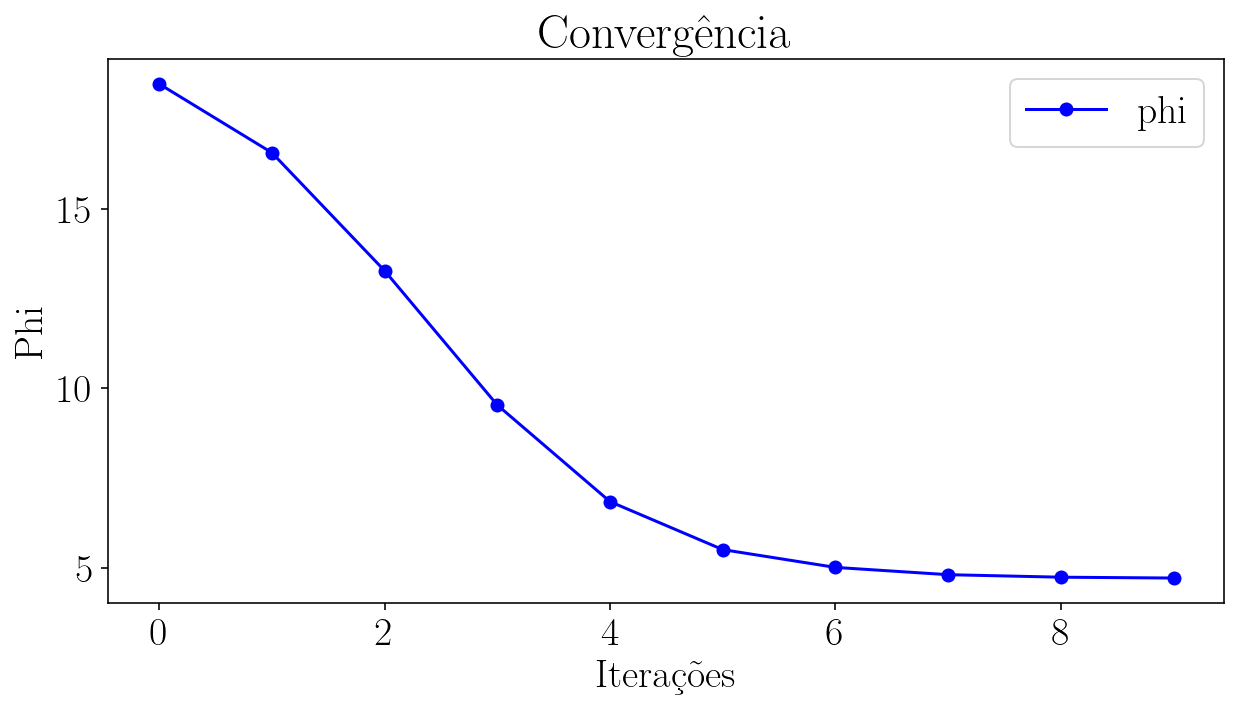

In [42]:
plt.plot(range(nbox),otimo[:,4], 'bo-',label='phi')# valores de eta por phi
plt.title('Convergência')
plt.xlabel('Iterações')
plt.ylabel('Phi')
plt.legend()
plt.savefig('../saidas/Convergencia_MC_6ESS168.png')

In [43]:
otimo[:,0]

array([ 1.51618194,  2.22189276,  3.08657054,  4.43041866,  6.40498927,
        9.34639173, 13.31780807, 19.13701683, 27.58964824, 33.4717406 ])

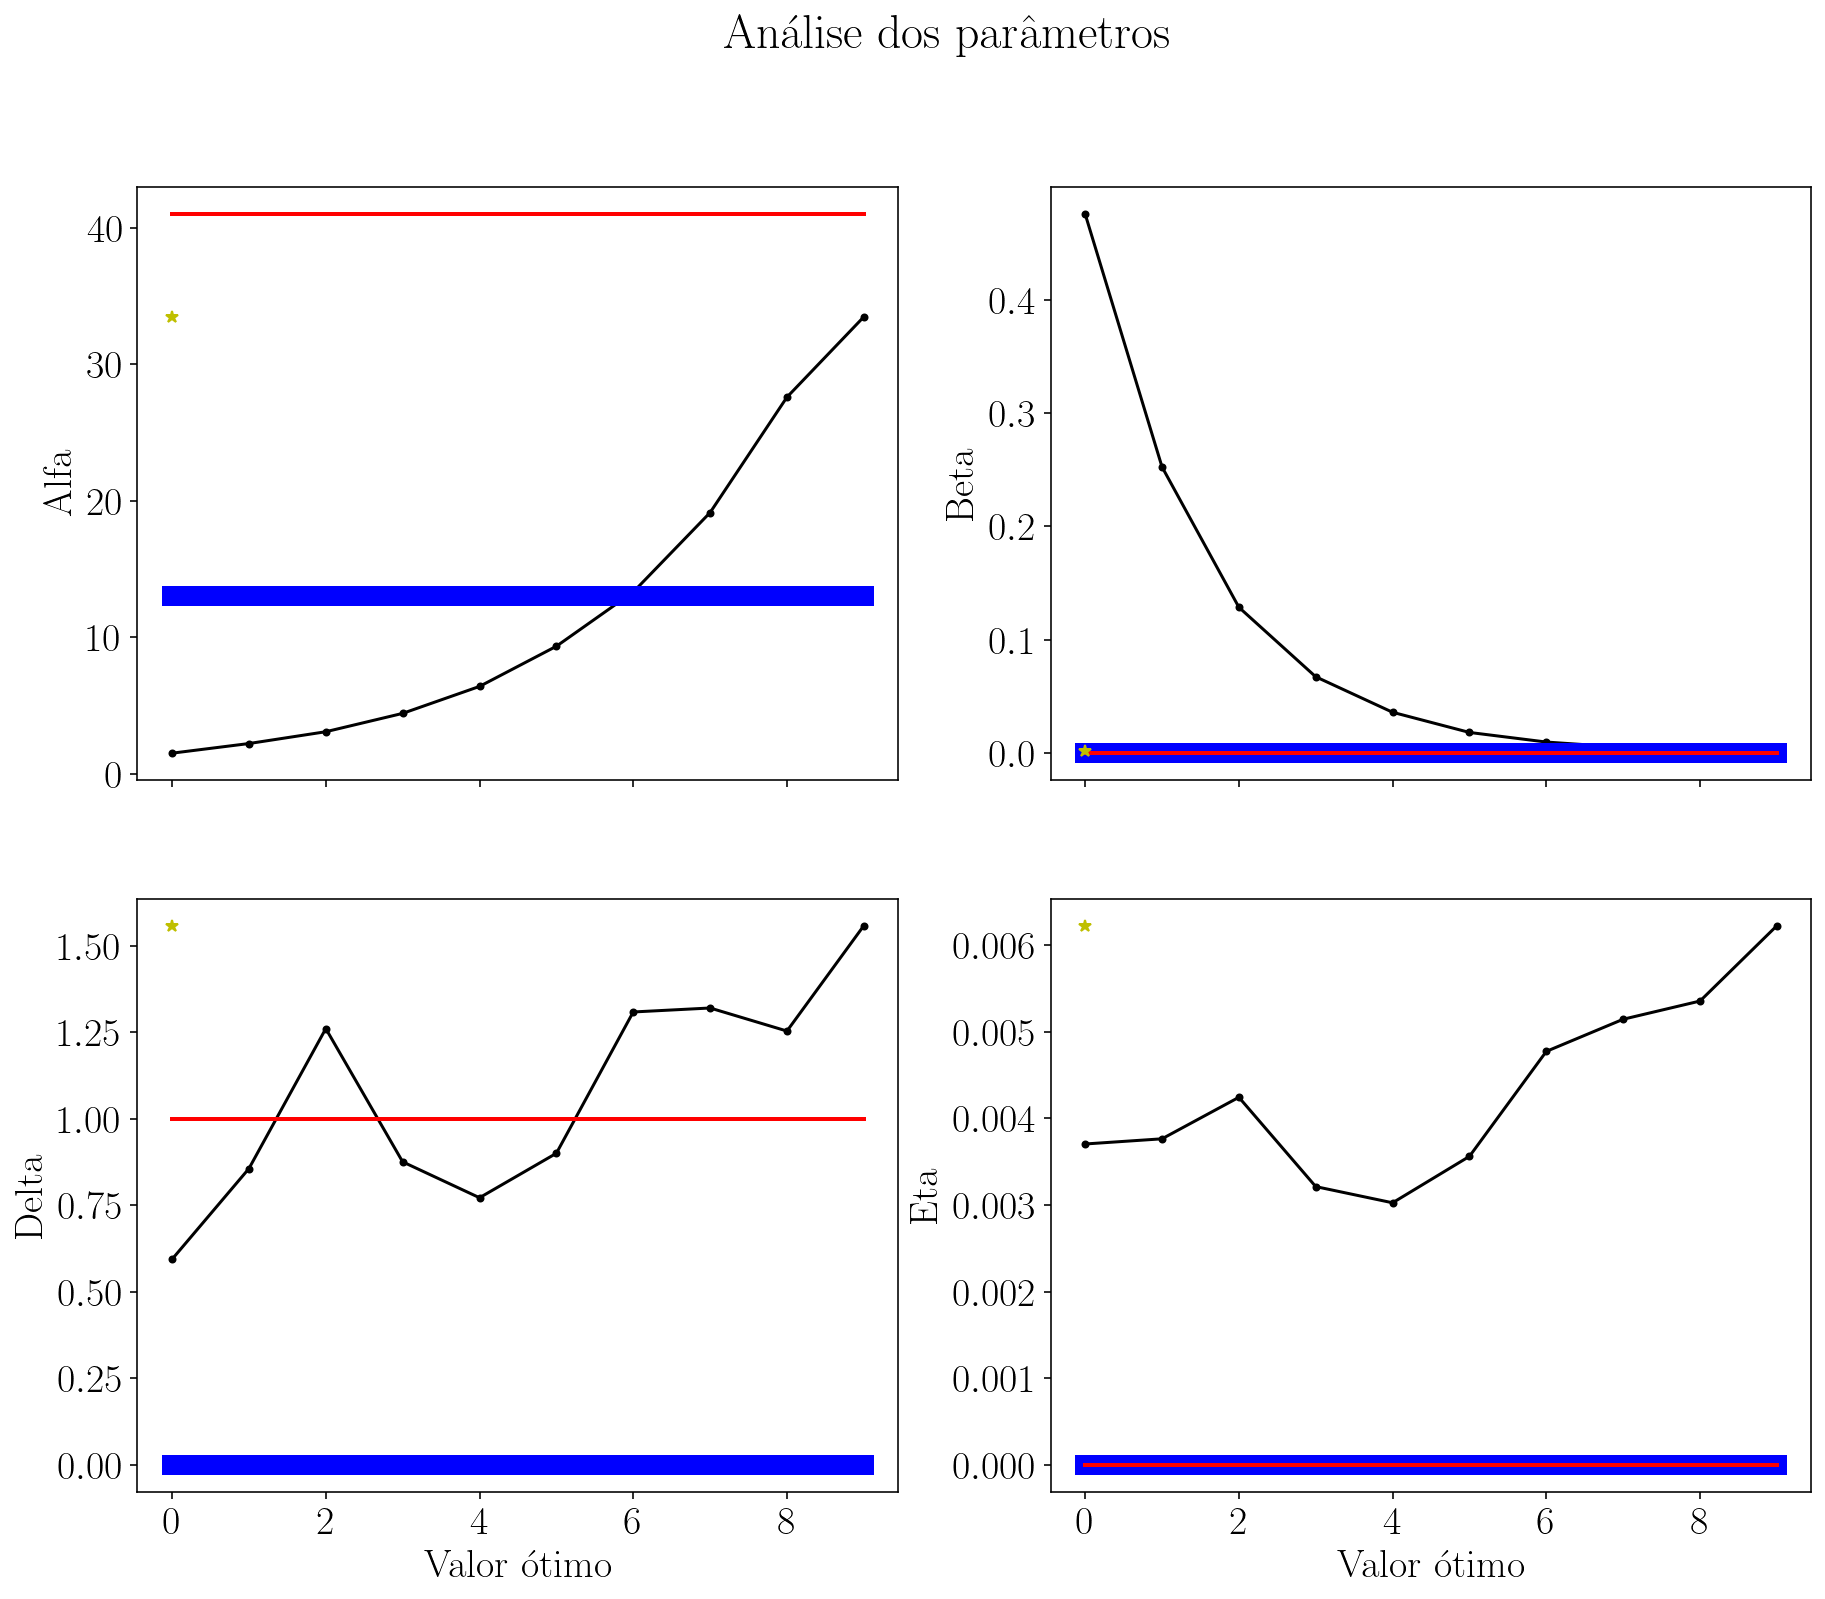

In [44]:
#fig, ax = plt.subplots(2,2, figsize=(15, 8), sharex=True, sharey=True)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=False)
fig.suptitle('Análise dos parâmetros')

ax1.plot(range(nbox),otimo[:,0],'k.-')
ax1.plot(range(nbox),np.full_like(range(nbox),alfamin),'b-',linewidth=10)
ax1.plot(range(nbox),np.full_like(range(nbox),alfamax),'r-',linewidth=2)
ax1.plot(alfa_otimo,'*y')
ax1.set_ylabel('Alfa')

ax2.plot(range(nbox),otimo[:,1],'k.-')
ax2.plot(range(nbox),np.full_like(range(nbox),betamin),'b-',linewidth=10)
ax2.plot(range(nbox),np.full_like(range(nbox),betamax),'r-',linewidth=2)
ax2.plot(beta_otimo,'*y')
ax2.set_ylabel('Beta')

ax3.plot(range(nbox),otimo[:,2],'k.-')
ax3.plot(range(nbox),np.full_like(range(nbox),deltamin),'b-',linewidth=10)
ax3.plot(range(nbox),np.full_like(range(nbox),deltamax),'r-',linewidth=2)
ax3.plot(delta_otimo,'*y')
ax3.set_xlabel('Valor ótimo')
ax3.set_ylabel('Delta')

ax4.plot(range(nbox),otimo[:,3], 'k.-')
ax4.plot(range(nbox),np.full_like(range(nbox),etamin),'b-',linewidth=10)
ax4.plot(range(nbox),np.full_like(range(nbox),etamax),'r-',linewidth=2)
ax4.plot(eta_otimo,'*y')
ax4.set_xlabel('Valor ótimo')
ax4.set_ylabel('Eta')

#plt.legend()
plt.savefig('../saidas/Analise_parametros_MC_6ESS168.png')

In [45]:
#Salva o log file e figura
# data atual
minimo = alfa_otimo,beta_otimo,delta_otimo,eta_otimo,phi[imelhor]
local = datetime.now()
H = local.strftime("%d%m%Y%H%M%S")
# Salva o melhor valor em um arquivo de log
minimo = pd.DataFrame(minimo)
minimo.to_csv('../log/MC6ESS168_'+H+'.txt',sep=' ', index=False)
plt.savefig('../saidas/MC6ESS168_'+H+'.png')

<Figure size 720x360 with 0 Axes>

# 5) Calculando o COT para os dados da Bacia do Espírito Santo


## 5.1) Poço 1ESS86A

In [46]:
deltaLR = dlogr90(LLD,LLDbaseline,DT,DTbaseline)

#deltaLR = dlogr(LLD,resbaseline,DT,dtbaseline,2)

In [47]:
cot_calc = passey16(deltaLR,alfa_otimo,beta_otimo,delta_otimo,eta_otimo,p[4],GR,GRbaseline)

In [48]:
mincot=np.min(cot_calc)

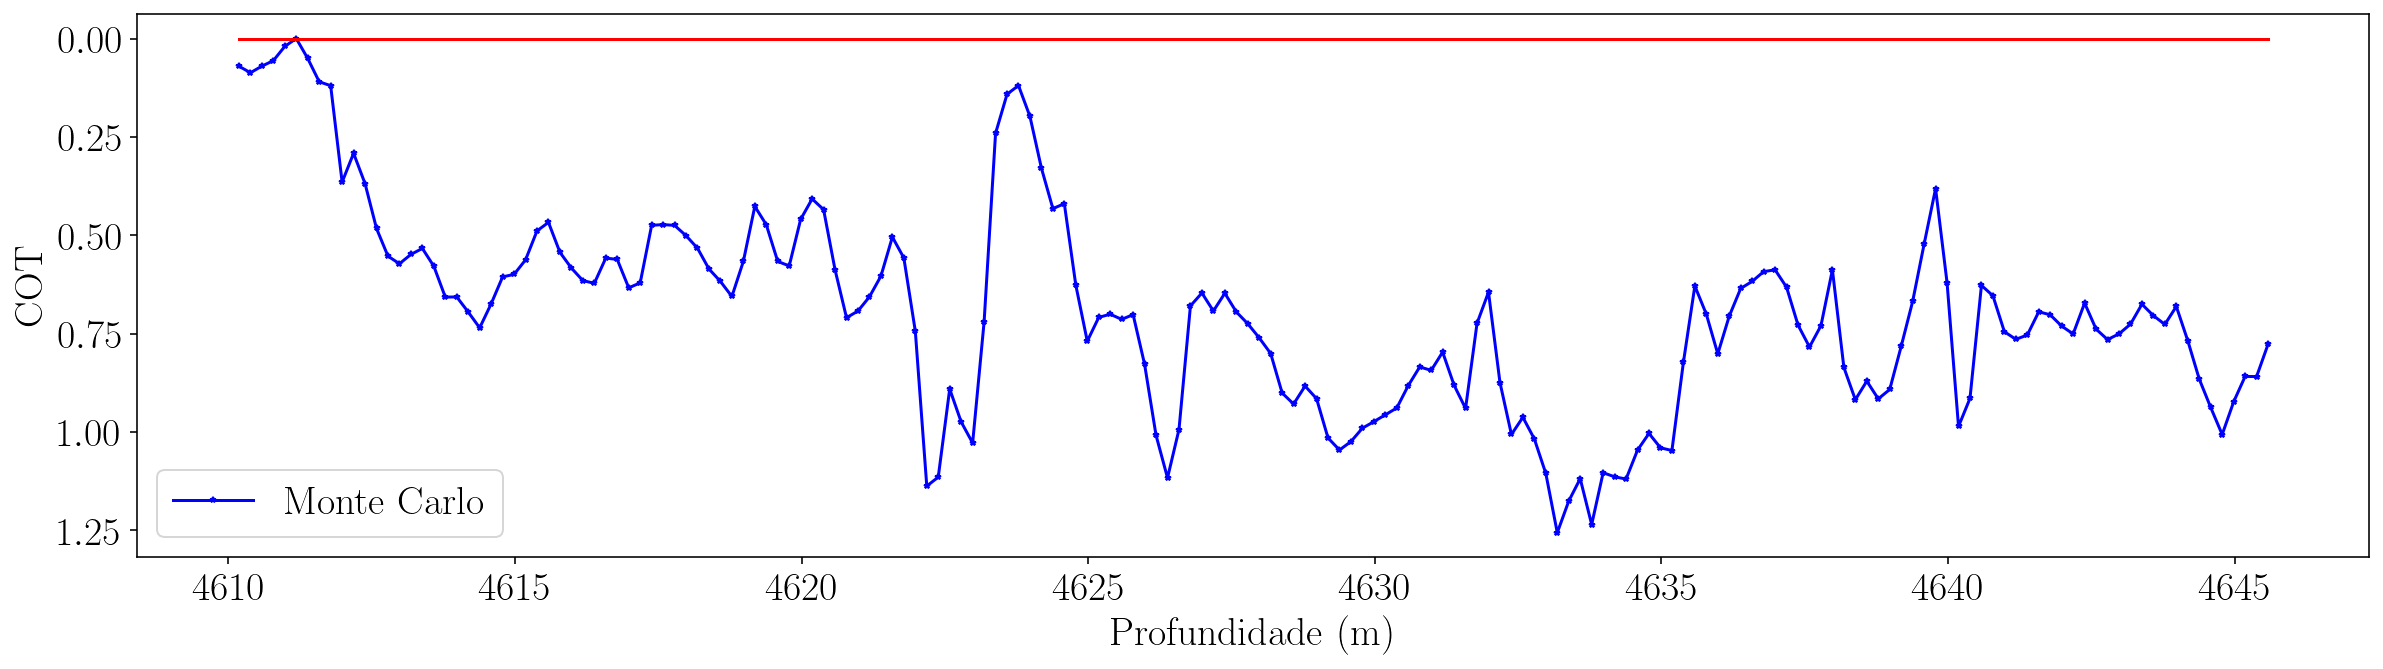

In [49]:
plt.figure(figsize=(20,5))
plt.plot(z,cot_calc-mincot,color='blue', marker='*', markersize=3,label='Monte Carlo')
plt.plot(z,np.zeros(len(z)),color='red')
plt.ylabel('COT')
plt.xlabel('Profundidade (m)')
plt.gca().invert_yaxis()   
plt.legend()
plt.savefig('../saidas/6ESS168_cot_MMC.png')

## 5.2) Seleciona um alvo

In [54]:
#Codificação do alvo desejado tempo geológico entre 89 e 100 Ma (Gálico Superior). Não tem no dado.
#Peguei o Gálico Médio 100ma 105ma
topo = 4610
base = 4640

galicodf = df

galicodf=galicodf[(galicodf['Depth'] >= topo) & (galicodf['Depth'] <= base)] # alvo! 

In [55]:
print(galicodf)

           Depth         Cali  DT_merge         GR  LITO        LLD  \
18746  4610.1839     8.989479  62.28869   82.11620    57   7.339714   
18747  4610.3839     9.017262  62.23649   87.16961    57   7.482254   
18748  4610.5839     9.054691  62.25541   84.96584    57   7.347755   
18749  4610.7839     9.083041  62.27635   80.55154    57   7.237862   
18750  4610.9839     8.882217  62.27126   79.14693    57   6.972360   
...          ...          ...       ...        ...   ...        ...   
18891  4639.1839 -9999.000000  66.29415  129.90700    57  12.760850   
18892  4639.3839 -9999.000000  65.03063  130.98530    57  12.004950   
18893  4639.5839 -9999.000000  63.96090  119.95980    57  10.845630   
18894  4639.7839 -9999.000000  63.07098  102.75970    57   9.772871   
18895  4639.9839 -9999.000000  62.15394   93.76699    57  13.093890   

              OG    RESD         ZDEN  
18746   82.11620 -9999.0     2.670002  
18747   87.16961 -9999.0     2.649270  
18748   84.96584 -9999.0   

In [56]:
# renomeia os vetores filtrados
zgalico = galicodf[galicodf.columns[0]]#prof
DTgalico = galicodf[galicodf.columns[2]]#sonico
NPHIgalico = galicodf[galicodf.columns[6]]#neutrao
RHOBgalico = galicodf[galicodf.columns[8]]#densidade
GRgalico = galicodf[galicodf.columns[3]]#GR
LLDgalico = galicodf[galicodf.columns[5]]#resistividade
CODEgalico = galicodf[galicodf.columns[4]]
print(np.size(zgalico))


150


In [57]:

#Calculo da linha de base:
LLDgalico_baseline = np.min(LLDgalico)
DTgalico_baseline = np.min(DTgalico)
GRgalico_baseline = np.min(GRgalico)

#Calculo do deltalogR:
galicodeltaLR = dlogr90(LLDgalico,DTgalico_baseline,DTgalico,DTgalico_baseline)

#Calculo do cot:
galicocot_calc = passey16(galicodeltaLR,alfa_otimo,beta_otimo,delta_otimo,eta_otimo,p[4],GRgalico,GRgalico_baseline)

#Valor min para o cot:
galicomincot=np.min(galicocot_calc)




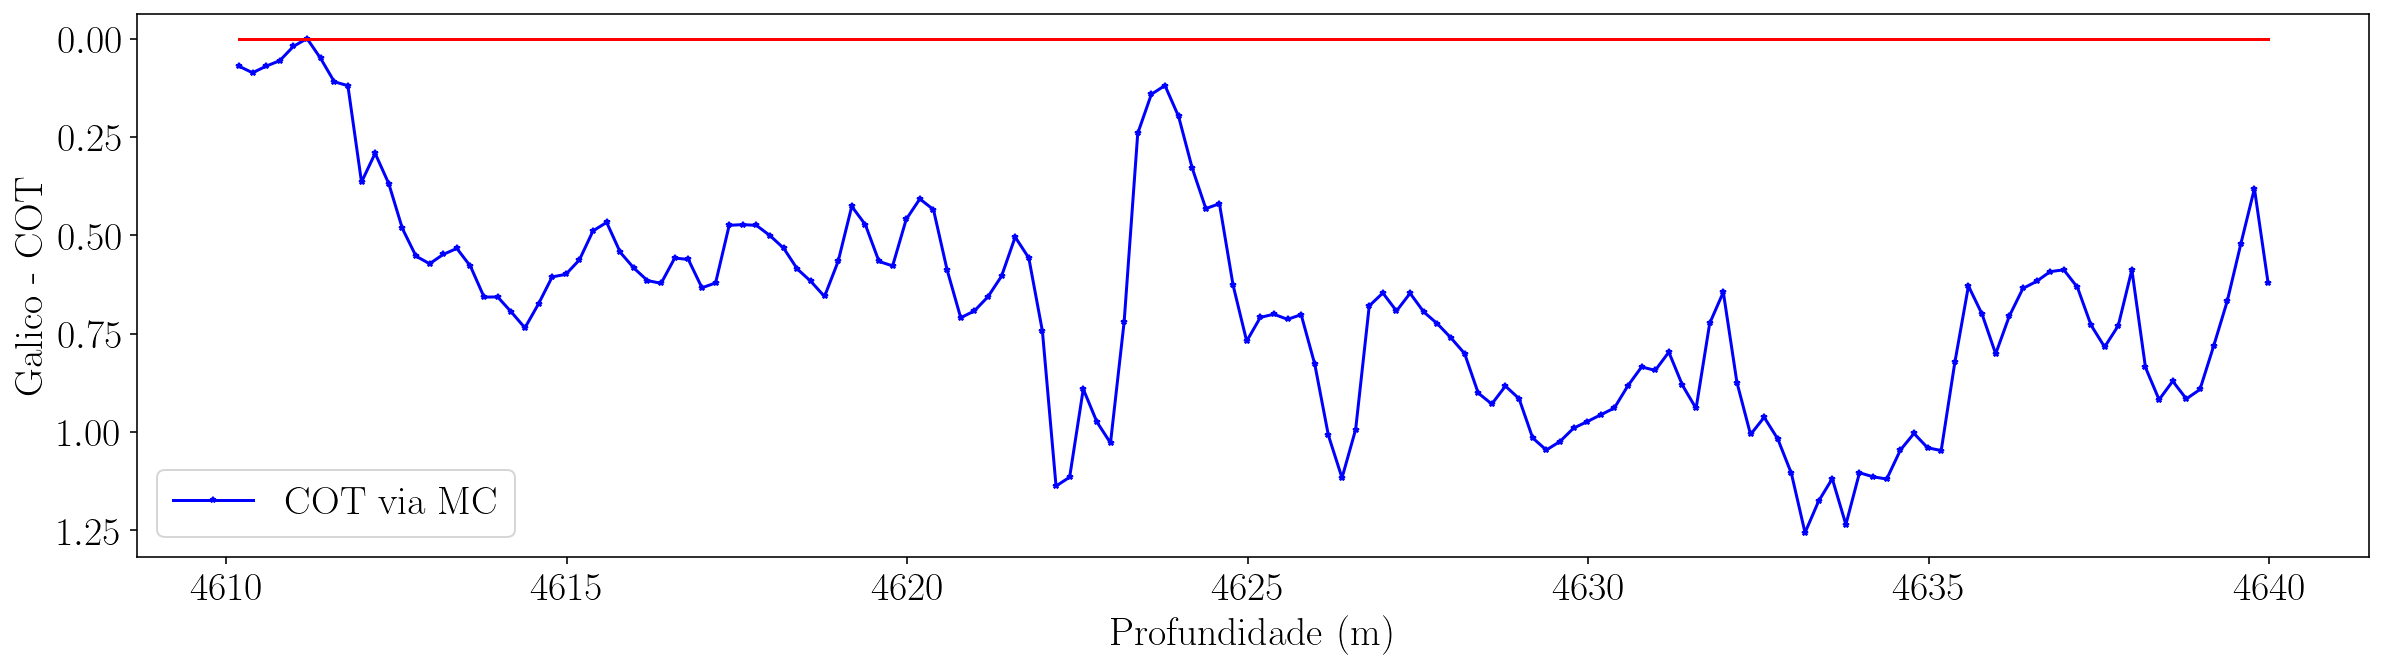

In [58]:
plt.figure(figsize=(20,5))
plt.plot(zgalico,galicocot_calc-galicomincot,color='blue', marker='*', markersize=3,label='COT via MC')
plt.plot(zgalico,np.zeros(len(zgalico)),color='red')
plt.ylabel('Galico - COT')
plt.xlabel('Profundidade (m)')
plt.gca().invert_yaxis()   
plt.legend()
plt.savefig('../saidas/Galico_6ESS168.png')

# Arquivos de saída COT

In [61]:
#120
inputk = pd.DataFrame({'Depth(m)':z,'Code':CODE,'COT': cot_calc-mincot ,'DT_merge':DT,'GR':GR})#,
                      #'NPHI':NPHI,'RHOB':RHOB})
inputk.to_csv('../saidas/6ESS168_COT.txt', sep=' ', index=False) 

In [62]:
#120: Galico
inputG = pd.DataFrame({'Depth(m)':zgalico,'Code':CODEgalico,'COT': galicocot_calc-galicomincot ,'DT_merge':DTgalico,'GR':GRgalico})#,
                      #'NPHI':NPHIgalico,'RHOB':RHOBgalico})
inputG.to_csv('../saidas/6ESS168galico_COT.txt', sep=' ', index=False) 

# FIM